In [9]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start = 0
def dtn():
    """Sets start variable to the current date and time
    
    IMPORTANT: must define global start variable before using"""
    global start
    start = dt.now()
    
def end():
    """Using in conjunction with dtn() function, returns the time taken between dtn() and this function being called"""
    return str(dt.now()-start)

def gen_end():
    """Generic function that gives a string telling how long it has been since dtn() was called. Can be used instead of end()"""
    stop = end()
    print("Completed in :"+stop)

In [3]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_a = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Authentication data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_a = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Authentication_data.gz?dl=1",compression="gzip",index_col=0)
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...


G:\Programs\Anaconda\envs\det\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Data fetched locally in 0:00:21.970679


In [4]:
df_a.head()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
0,User035855,Comp808475,Comp081330,TGS,0,17.0
1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350.0
2,User762066,Comp306129,ActiveDirectory,TGS,0,22.0
3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35.0
4,User043263,Comp883307,Comp384394,TGS,0,2.0


In [5]:
df_a.tail()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
80187,Comp955366$,Comp955366,ActiveDirectory,TGS,0,23.0
80188,Comp589380$,Comp589380,ActiveDirectory,TGT,0,37.0
80189,Comp629793$,Comp629793,ActiveDirectory,TGS,0,21.0
80190,User104387,Comp917362,ActiveDirectory,NetworkLogon,0,387.0
80191,User992201,Comp487027,Comp915658,NetworkLogon,0,1.0


In [10]:
x = ["UserName","SrcDevice","DstDevice","Authent Type"]
counts = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts.append(z)

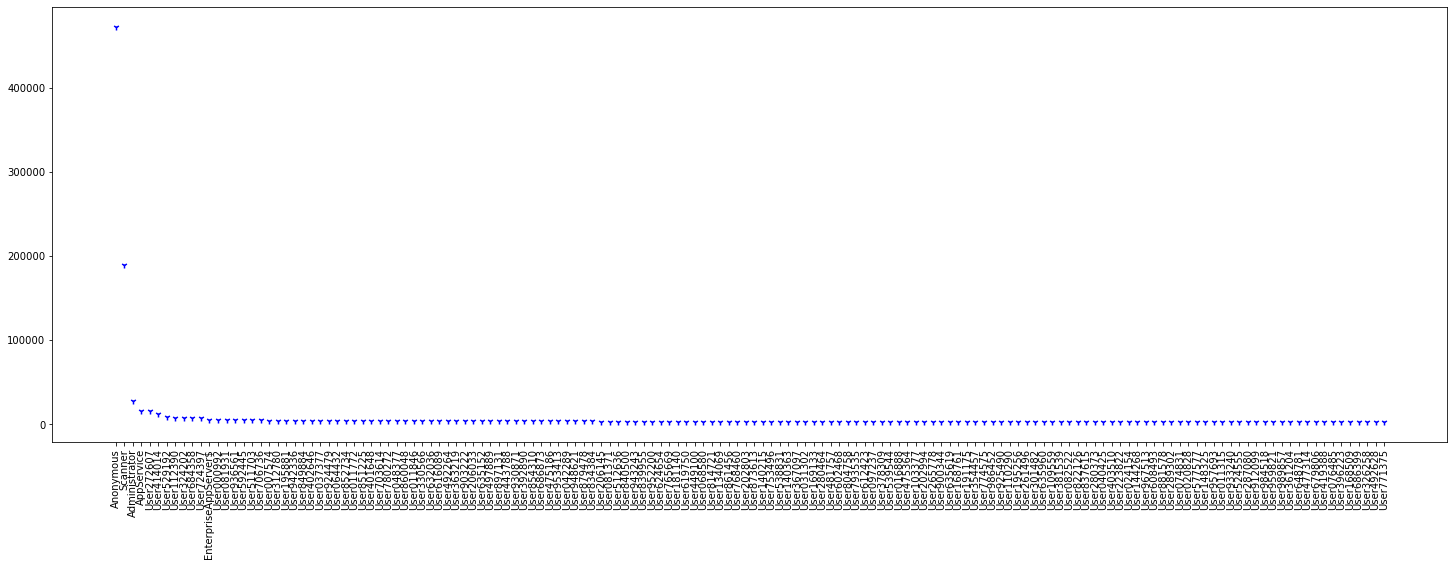

In [11]:
x=counts[0].loc[:,"UserName"].head(150)
y=counts[0].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Blue")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/UserNames_Head_150.png")
plt.show()

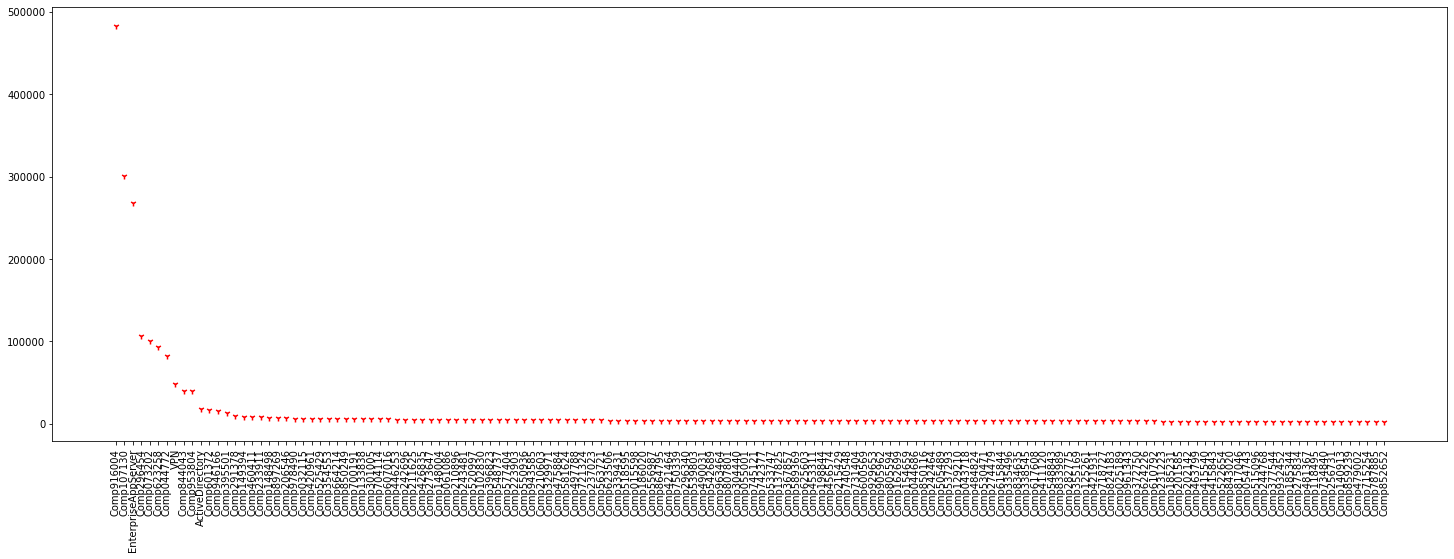

In [13]:
x=counts[1].loc[:,"SrcDevice"].head(150)
y=counts[1].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Red")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/SrcDevice_Head_150.png")
plt.show()

In [ ]:
x=counts[2].loc[:,"DstDevice"].head(150)
y=counts[2].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Yellow")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/DstDevice_Head_150.png")
plt.show()